In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv(r"train.csv (1).zip")
df.head(5)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
df.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
MedInc,2.385900,3.718800,4.775000,2.413800,3.750000
HouseAge,15.000000,17.000000,27.000000,16.000000,52.000000
AveRooms,3.827160,6.013373,6.535604,3.350203,4.284404
AveBedrms,1.112100,1.054217,1.103175,0.965432,1.069246
Population,1280.000000,1504.000000,1061.000000,1255.000000,1793.000000
AveOccup,2.486989,3.813084,2.464602,2.089286,1.604790
Latitude,34.600000,38.690000,34.710000,32.660000,37.800000
Longitude,-120.120000,-121.220000,-120.450000,-117.090000,-122.410000
MedHouseVal,0.980000,0.946000,1.576000,1.336000,4.500000


In [5]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


Можно заметить:
*   Выбросы в медианном доходе
*   Среднем количестве комнат в домме
*   Среднем количестве спальных комнат
*   Огромный выброс в населении района
*   Среднем количестве жильцов на дом

Берём на заметку.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


Пропусков нет, значит можно начать изучение данных.

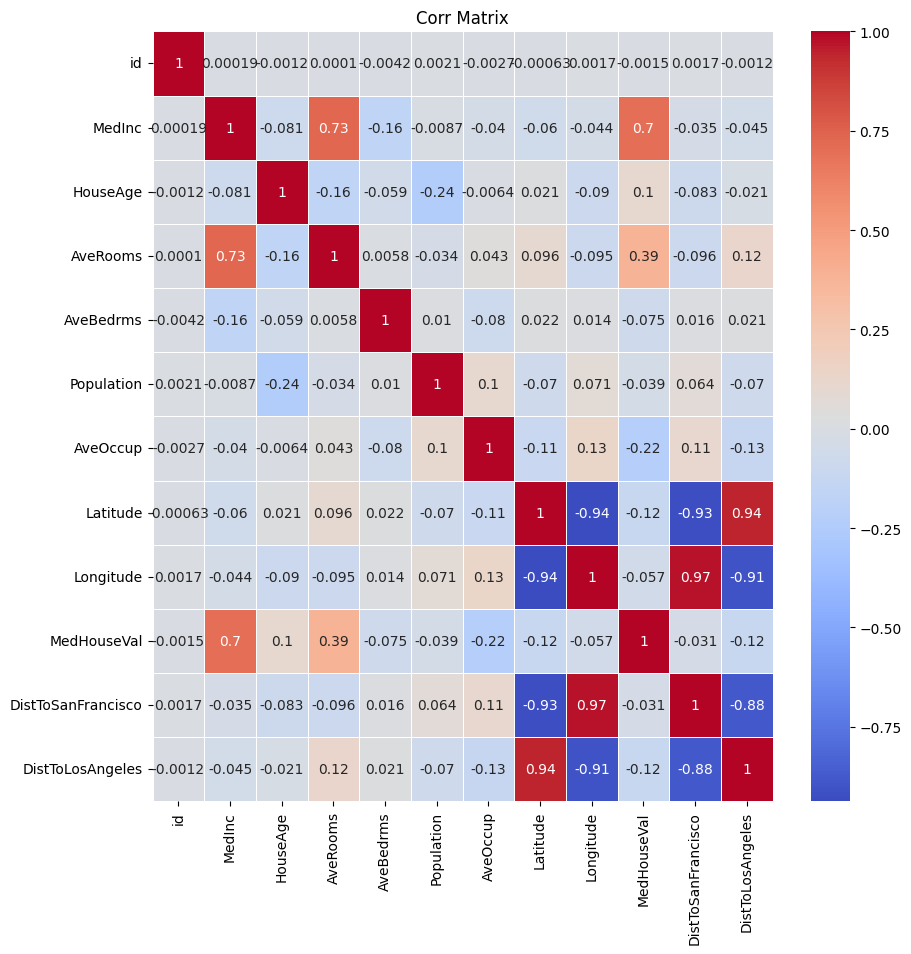

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corr Matrix")
plt.show()

Можно заметить высокую обратную зависимость между долготой и широтой, значит могу выкинуть из данных один из этих столбцов.

<ipython-input-3-86a57b183ee4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='MedInc', data=df, palette='Blues')
<ipython-input-3-86a57b183ee4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='AveRooms', data=df, palette='Reds')
<ipython-input-3-86a57b183ee4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='AveBedrms', data=df, palette='Blues')
<ipython-input-3-86a57b183ee4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend

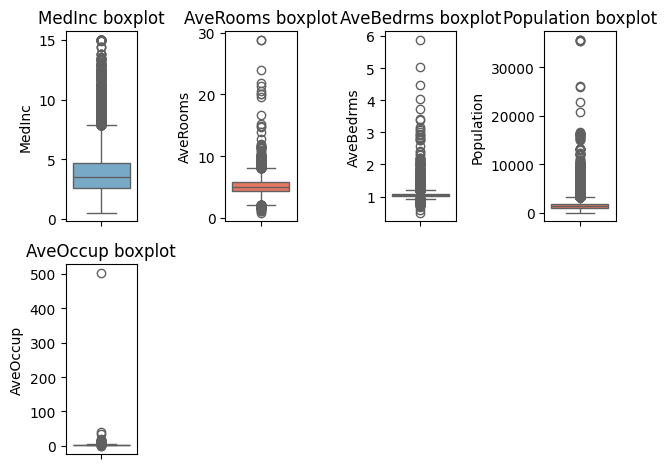

In [ ]:
plt.subplot(2,4,1)
plt.title("MedInc boxplot")
sns.boxplot(y='MedInc', data=df, palette='Blues')
plt.tight_layout()

plt.subplot(2,4,2)
plt.title("AveRooms boxplot")
sns.boxplot(y='AveRooms', data=df, palette='Reds')
plt.tight_layout()

plt.subplot(2,4,3)
plt.title("AveBedrms boxplot")
sns.boxplot(y='AveBedrms', data=df, palette='Blues')
plt.tight_layout()

plt.subplot(2,4,4)
plt.title("Population boxplot")
sns.boxplot(y='Population', data=df, palette='Reds')
plt.tight_layout()

plt.subplot(2,4,5)
plt.title("AveOccup boxplot")
sns.boxplot(y='AveOccup', data=df, palette='Blues')
plt.tight_layout()

In [ ]:
df = df[(df['AveRooms'] < 10) & (df['AveBedrms'] < 2) & (df['AveOccup'] < 100)]


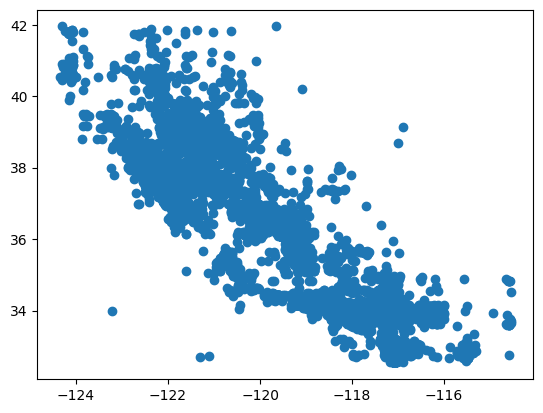

In [ ]:
plt.scatter("Longitude","Latitude",data = df)

In [ ]:
df = df[(df['Longitude'] > -120.4) | (df['Latitude'] > 34)]
df = df[(df['Longitude'] <= -120) | (df['Latitude']<=38.5)]

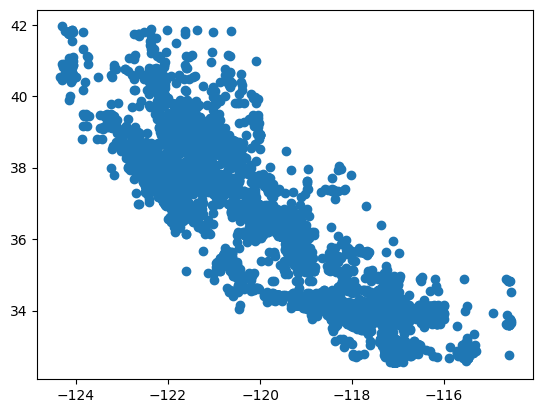

In [ ]:
plt.scatter("Longitude","Latitude",data = df)

In [ ]:
pip install geopy

In [ ]:
from geopy.distance import geodesic

In [ ]:
SanFranciscoCenter = (37.79216505379547,-122.39807746905446)
LosAngelesCenter = (34.042759373020075, -118.25060417243205)

In [ ]:
df['DistToSanFrancisco'] = df.apply(
    lambda row: geodesic((row['Latitude'], row['Longitude']), SanFranciscoCenter).kilometers, axis=1
)
df['DistToLosAngeles'] = df.apply(
    lambda row: geodesic((row['Latitude'], row['Longitude']), LosAngelesCenter).kilometers, axis=1
)
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,DistToSanFrancisco,DistToLosAngeles
count,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000,37120.000000
mean,18568.455172,3.851542,26.059106,5.162512,1.062075,1661.038300,2.831374,35.568862,-119.554204,2.080257,383.659233,259.907671
std,10720.063654,1.803334,12.159465,1.203119,0.095150,1302.640727,2.703012,2.082285,1.974248,1.158571,254.344186,245.054474
min,0.000000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990,0.293976,0.311121
25%,9285.750000,2.602300,17.000000,4.357509,1.020305,952.000000,2.394487,33.930000,-121.800000,1.208000,101.120843,29.020395
50%,18568.500000,3.516400,25.000000,5.068282,1.054517,1384.000000,2.744843,34.190000,-118.450000,1.809000,536.704185,160.941491
75%,27851.250000,4.700000,35.000000,5.858597,1.088785,1857.000000,3.125619,37.700000,-118.020000,2.661000,584.248822,526.740722
max,37136.000000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010,902.207580,1025.325274


In [ ]:
y = df['MedHouseVal']
x = df.drop(columns = ["id",'MedHouseVal'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)
print(mae)
print(mape)

Среднеквадратичная ошибка (MSE): 0.5054469679202976
Коэффициент детерминации (R^2): 0.6157999713952444
0.5215324916091121
0.30771908843971546


### **1-sum(y1-yp)^2/sum(y1-ym)^2**